<a href="https://colab.research.google.com/github/vedant1kadam/Vedant_kadam/blob/main/5thsemproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mplot
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from google.colab import sheets



In [7]:
F1 = pd.read_excel("/content/Details_of_road_accident_deaths_by_situation_state_2014.xlsx")
F2 = pd.read_excel("/content/laneAccidents.xlsx")
F3 = pd.read_excel("accidents3-15.xlsx")
F4 = pd.read_excel("/content/RA2021_A13c.xlsx")
F5 = pd.read_csv('/content/roadAccStats13-16.csv')

In [7]:
F1.head()

,States/Uts,year-2003,year-2004,year-2005,year-2006,year-2007,year-2008,year-2009,year-2010,year-2011,year-2012,year-2013,year-2014,year-2015,year-2016
0,Andhra Pradesh,8616,9343,9126,11378,11885,12233,12676,13932,13783,13560,13175,7277,7524,7851
1,Arunachal Pradesh,65,79,63,87,81,90,114,108,96,94,120,92,117,103
2,Assam,1120,1177,1420,1627,1483,1641,1735,1924,2015,2011,2162,2169,2122,2445
3,Bihar,2138,1579,1462,2315,3074,3514,4038,4513,4676,4706,4612,4505,4771,4425
4,Chhattisgarh,1788,1892,2049,2288,2496,2600,2566,2668,2659,2783,3059,3570,3710,3527


In [16]:
F1.shape

(1443, 11)

In [10]:
F2.head()

,State/UT,Single Lane - Accident - 2014,Single Lane - Killed - 2014,Single Lane - Injured - 2014,Two Lanes - Accident - 2014,Two Lanes - Killed - 2014,Two Lanes - Injured - 2014,3 Lanes or more w.o Median - Accident - 2014,3 Lanes or more w.o Median - Killed - 2014,3 Lanes or more w.o Median - Injured - 2014,4 Lanes with Median - Accident - 2014,4 Lanes with Median - Killed - 2014,4 Lanes with Median - Injured - 2014,Population
0,Andhra Pradesh,8634,2958,13541,10327,2994,10122,1188,396,1199,4291,1560,5069,52410653
1,Arunachal Pradesh,90,60,152,115,59,156,0,0,0,0,0,0,1383727
2,Assam,3888,1217,3195,2432,1035,2510,56,25,42,768,245,752,31205576
3,Bihar,3731,1815,2475,4156,2096,3092,756,390,485,913,612,588,104099452
4,Chhattisgarh,7961,2244,7762,4696,1524,4661,0,0,0,1164,254,734,25545198


In [17]:
F2.shape

(37, 14)

In [11]:
F3.head()

,States/Uts,year-2003,year-2004,year-2005,year-2006,year-2007,year-2008,year-2009,year-2010,year-2011,year-2012,year-2013,year-2014,year-2015,year-2016
0,Andhra Pradesh,8616,9343,9126,11378,11885,12233,12676,13932,13783,13560,13175,7277,7524,7851
1,Arunachal Pradesh,65,79,63,87,81,90,114,108,96,94,120,92,117,103
2,Assam,1120,1177,1420,1627,1483,1641,1735,1924,2015,2011,2162,2169,2122,2445
3,Bihar,2138,1579,1462,2315,3074,3514,4038,4513,4676,4706,4612,4505,4771,4425
4,Chhattisgarh,1788,1892,2049,2288,2496,2600,2566,2668,2659,2783,3059,3570,3710,3527


In [19]:
F3.shape

(37, 15)

In [12]:
F4.head()

,States/Uts,Over-Speeding - National Highways under NHAI - Total Accidents,Over-Speeding - National Highways under NHAI - Death,Over-Speeding - National Highways under State PWD - Total Accidents,Over-Speeding - National Highways under State PWD - Death,Over-Speeding - National Highways under Other department - Total Accidents,Over-Speeding - National Highways under Other department - Death,Drunken Driving/ Consumption of alcohol and drug - National Highways under NHAI - Total Accidents,Drunken Driving/ Consumption of alcohol and drug - National Highways under NHAI - Death,Drunken Driving/ Consumption of alcohol and drug - National Highways under State PWD - Total Accidents,...,Others - National Highways under State PWD - Total Accidents,Others - National Highways under State PWD - Death,Others - National Highways under Other department - Total Accidents,Others - National Highways under Other department - Death,Total - National Highways under NHAI - Total Accidents,Total - National Highways under NHAI - Death,Total - National Highways under State PWD - Total Accidents,Total - National Highways under State PWD - Death,Total - National Highways under Other department - Total Accidents,Total - National Highways under Other department - Death
0,Andhra Pradesh,5167.0,2155.0,1760.0,800.0,113.0,13.0,23.0,8.0,8.0,...,356.0,158.0,4.0,2.0,5937,2603,2148,974,156,25
1,Arunachal Pradesh,32.0,17.0,21.0,10.0,0.0,0.0,18.0,12.0,7.0,...,10.0,5.0,0.0,0.0,89,55,58,32,0,0
2,Assam,1827.0,878.0,697.0,302.0,444.0,185.0,76.0,28.0,53.0,...,3.0,1.0,22.0,9.0,2123,1020,753,330,532,224
3,Bihar,1200.0,904.0,440.0,383.0,0.0,0.0,6.0,2.0,4.0,...,425.0,347.0,0.0,0.0,3403,2726,946,791,0,0
4,Chhattisgarh,1600.0,721.0,1737.0,799.0,0.0,0.0,16.0,8.0,4.0,...,106.0,62.0,0.0,0.0,1734,783,1876,880,0,0


In [18]:
F4.shape

(38, 43)

In [15]:
F5.head()

,SI. No.,States/UTs,State/UT-Wise Total Number of Road Accidents during - 2013,State/UT-Wise Total Number of Road Accidents during - 2014,State/UT-Wise Total Number of Road Accidents during - 2015,State/UT-Wise Total Number of Road Accidents during - 2016,Share of States/UTs in Total Number of Road Accidents - 2013,Share of States/UTs in Total Number of Road Accidents - 2014,Share of States/UTs in Total Number of Road Accidents - 2015,Share of States/UTs in Total Number of Road Accidents - 2016,Total Number of Accidents Per Lakh Population - 2013,Total Number of Accidents Per Lakh Population - 2014,Total Number of Accidents Per Lakh Population - 2015,Total Number of Accidents Per Lakh Population - 2016,"Total Number of Road Accidents per 10,000 Vehicles - 2013","Total Number of Road Accidents per 10,000 Vehicles - 2014","Total Number of Road Accidents per 10,000 Vehicles - 2015","Total Number of Road Accidents per 10,000 Km of Roads - 2013","Total Number of Road Accidents per 10,000 Km of Roads - 2014","Total Number of Road Accidents per 10,000 Km of Roads - 2015"
0,1,Andhra Pradesh,43482.0,24440,24258,24888,8.9,5.0,4.8,5.2,50.4,28.1,27.7,28.2,34.3,34.9,30.8,1661.8,1372.3,1355.0
1,2,Arunachal Pradesh,308.0,205,284,249,0.1,0.0,0.1,0.1,24.3,16.0,21.9,19.0,20.4,13.6,18.8,109.6,83.8,112.0
2,3,Assam,7211.0,7144,6959,7435,1.5,1.5,1.4,1.5,23.0,22.5,21.7,22.9,38.4,32.2,27.7,250.3,227.8,213.1
3,4,Bihar,10200.0,9556,9555,8222,2.1,2.0,1.9,1.7,10.2,9.4,9.3,7.9,28.2,23.0,20.0,517.1,455.6,463.8
4,5,Chhattisgarh,13657.0,13821,14446,13580,2.8,2.8,2.9,2.8,54.8,54.8,56.5,52.5,39.7,35.7,33.5,1530.4,1461.3,1481.1


In [25]:
sheets.InteractiveSheet(df=F5)

https://docs.google.com/spreadsheets/d/1jtFVPjREScUbFgHhhlY30oiHmBXdmFaTtKRzaFlp5jg#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [26]:
F5.shape

(37, 20)

In [ ]:
F1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   States/UTs                                      1443 non-null   object
 1   Year                                            1443 non-null   object
 2   CrimeHead                                       1443 non-null   object
 3   Offenders (Driver/Pedestrian) Died_Male         1443 non-null   int64 
 4   Offenders (Driver/Pedestrian) Died_Female       1443 non-null   int64 
 5   Offenders (Driver/Pedestrian) Died_Transgender  1443 non-null   int64 
 6   Offenders (Driver/Pedestrian) Died_Total        1443 non-null   int64 
 7   Victims Died_Male                               1443 non-null   int64 
 8   Victims Died_Female                             1443 non-null   int64 
 9   Victims Died_Transgender                        1443

In [ ]:
F2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   S.No                                          37 non-null     object 
 1   State/UT                                      37 non-null     object 
 2   Single Lane - Accident - 2014                 36 non-null     float64
 3   Single Lane - Killed - 2014                   36 non-null     float64
 4   Single Lane - Injured - 2014                  36 non-null     float64
 5   Two Lanes - Accident - 2014                   36 non-null     float64
 6   Two Lanes - Killed - 2014                     36 non-null     float64
 7   Two Lanes - Injured - 2014                    36 non-null     float64
 8   3 Lanes or more w.o Median - Accident - 2014  36 non-null     float64
 9   3 Lanes or more w.o Median - Killed - 2014    36 non-null     float

In [ ]:
F3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   States/Uts  37 non-null     object
 1   year-2003   37 non-null     int64 
 2   year-2004   37 non-null     int64 
 3   year-2005   37 non-null     int64 
 4   year-2006   37 non-null     int64 
 5   year-2007   37 non-null     int64 
 6   year-2008   37 non-null     int64 
 7   year-2009   37 non-null     int64 
 8   year-2010   37 non-null     int64 
 9   year-2011   37 non-null     int64 
 10  year-2012   37 non-null     int64 
 11  year-2013   37 non-null     int64 
 12  year-2014   37 non-null     int64 
 13  year-2015   37 non-null     int64 
 14  year-2016   37 non-null     int64 
dtypes: int64(14), object(1)
memory usage: 4.5+ KB


In [ ]:
F4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 43 columns):
 #   Column                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                         --------------  -----  
 0   States/UTs                                                                                                     38 non-null     object 
 1   Over-Speeding - National Highways under NHAI - Total Accidents                                                 37 non-null     float64
 2   Over-Speeding - National Highways under NHAI - Death                                                           37 non-null     float64
 3   Over-Speeding - National Highways under State PWD - Total Accidents                                            37 non-null     float64
 4   Over-Speeding - National Highways under State PWD - 

In [27]:
F5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 20 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   SI. No.                                                       37 non-null     object 
 1   States/UTs                                                    37 non-null     object 
 2   State/UT-Wise Total Number of Road Accidents during - 2013    36 non-null     float64
 3   State/UT-Wise Total Number of Road Accidents during - 2014    37 non-null     int64  
 4   State/UT-Wise Total Number of Road Accidents during - 2015    37 non-null     int64  
 5   State/UT-Wise Total Number of Road Accidents during - 2016    37 non-null     int64  
 6   Share of States/UTs in Total Number of Road Accidents - 2013  37 non-null     float64
 7   Share of States/UTs in Total Number of Road Accidents - 2014  37 non-null

In [ ]:
F1.columns

Index(['States/UTs', 'Year', 'CrimeHead',
       'Offenders (Driver/Pedestrian) Died_Male',
       'Offenders (Driver/Pedestrian) Died_Female',
       'Offenders (Driver/Pedestrian) Died_Transgender',
       'Offenders (Driver/Pedestrian) Died_Total', 'Victims Died_Male',
       'Victims Died_Female', 'Victims Died_Transgender',
       'Victims Died_Total'],
      dtype='object')

In [ ]:
F2.columns

Index(['S.No', 'State/UT', 'Single Lane - Accident - 2014',
       'Single Lane - Killed - 2014', 'Single Lane - Injured - 2014',
       'Two Lanes - Accident - 2014', 'Two Lanes - Killed - 2014',
       'Two Lanes - Injured - 2014',
       '3 Lanes or more w.o Median - Accident - 2014',
       '3 Lanes or more w.o Median - Killed - 2014',
       '3 Lanes or more w.o Median - Injured - 2014',
       '4 Lanes with Median - Accident - 2014',
       '4 Lanes with Median - Killed - 2014',
       '4 Lanes with Median - Injured - 2014', 'Population'],
      dtype='object')

In [28]:
F3.columns

Index(['States/Uts', 'year-2003', 'year-2004', 'year-2005', 'year-2006',
       'year-2007', 'year-2008', 'year-2009', 'year-2010', 'year-2011',
       'year-2012', 'year-2013', 'year-2014', 'year-2015', 'year-2016'],
      dtype='object')

In [29]:
F4.columns

Index(['States/Uts',
       'Over-Speeding - National Highways under NHAI - Total Accidents',
       'Over-Speeding - National Highways under NHAI - Death',
       'Over-Speeding - National Highways under State PWD - Total Accidents',
       'Over-Speeding - National Highways under State PWD - Death',
       'Over-Speeding - National Highways under Other department - Total Accidents',
       'Over-Speeding - National Highways under Other department - Death',
       'Drunken Driving/ Consumption of alcohol and drug - National Highways under NHAI - Total Accidents',
       'Drunken Driving/ Consumption of alcohol and drug - National Highways under NHAI - Death',
       'Drunken Driving/ Consumption of alcohol and drug - National Highways under State PWD - Total Accidents',
       'Drunken Driving/ Consumption of alcohol and drug - National Highways under State PWD - Death',
       'Drunken Driving/ Consumption of alcohol and drug - National Highways under Other department - Total Acciden

In [30]:
F5.columns

Index(['SI. No.', 'States/UTs',
       'State/UT-Wise Total Number of Road Accidents during - 2013',
       'State/UT-Wise Total Number of Road Accidents during - 2014',
       'State/UT-Wise Total Number of Road Accidents during - 2015',
       'State/UT-Wise Total Number of Road Accidents during - 2016',
       'Share of States/UTs in Total Number of Road Accidents - 2013',
       'Share of States/UTs in Total Number of Road Accidents - 2014',
       'Share of States/UTs in Total Number of Road Accidents - 2015',
       'Share of States/UTs in Total Number of Road Accidents - 2016',
       'Total Number of Accidents Per Lakh Population - 2013',
       'Total Number of Accidents Per Lakh Population - 2014',
       'Total Number of Accidents Per Lakh Population - 2015',
       'Total Number of Accidents Per Lakh Population - 2016',
       'Total Number of Road Accidents per 10,000 Vehicles - 2013',
       'Total Number of Road Accidents per 10,000 Vehicles - 2014',
       'Total Number

In [31]:
F1.isnull().sum()

,0
States/UTs,0
Year,0
CrimeHead,0
Offenders (Driver/Pedestrian) Died_Male,0
Offenders (Driver/Pedestrian) Died_Female,0
Offenders (Driver/Pedestrian) Died_Transgender,0
Offenders (Driver/Pedestrian) Died_Total,0
Victims Died_Male,0
Victims Died_Female,0
Victims Died_Transgender,0


In [ ]:
F2.isnull().sum()

S.No                                            0
State/UT                                        0
Single Lane - Accident - 2014                   1
Single Lane - Killed - 2014                     1
Single Lane - Injured - 2014                    1
Two Lanes - Accident - 2014                     1
Two Lanes - Killed - 2014                       1
Two Lanes - Injured - 2014                      1
3 Lanes or more w.o Median - Accident - 2014    1
3 Lanes or more w.o Median - Killed - 2014      1
3 Lanes or more w.o Median - Injured - 2014     1
4 Lanes with Median - Accident - 2014           1
4 Lanes with Median - Killed - 2014             1
4 Lanes with Median - Injured - 2014            1
Population                                      0
dtype: int64

In [ ]:
F3.isnull().sum()

States/Uts    0
year-2003     0
year-2004     0
year-2005     0
year-2006     0
year-2007     0
year-2008     0
year-2009     0
year-2010     0
year-2011     0
year-2012     0
year-2013     0
year-2014     0
year-2015     0
year-2016     0
dtype: int64

In [ ]:
F4.isnull().sum()

States/UTs                                                                                                       0
Over-Speeding - National Highways under NHAI - Total Accidents                                                   1
Over-Speeding - National Highways under NHAI - Death                                                             1
Over-Speeding - National Highways under State PWD - Total Accidents                                              1
Over-Speeding - National Highways under State PWD - Death                                                        1
Over-Speeding - National Highways under Other department - Total Accidents                                       1
Over-Speeding - National Highways under Other department - Death                                                 1
Drunken Driving/ Consumption of alcohol and drug - National Highways under NHAI - Total Accidents                1
Drunken Driving/ Consumption of alcohol and drug - National Highways under NHAI 

In [32]:
F5.isnull().sum()

,0
SI. No.,0
States/UTs,0
State/UT-Wise Total Number of Road Accidents during - 2013,1
State/UT-Wise Total Number of Road Accidents during - 2014,0
State/UT-Wise Total Number of Road Accidents during - 2015,0
State/UT-Wise Total Number of Road Accidents during - 2016,0
Share of States/UTs in Total Number of Road Accidents - 2013,0
Share of States/UTs in Total Number of Road Accidents - 2014,0
Share of States/UTs in Total Number of Road Accidents - 2015,0
Share of States/UTs in Total Number of Road Accidents - 2016,0


In [8]:
A=F1.copy()
L=F2.copy()
Y=F3.copy()
R=F4.copy()
S=F5.copy()

In [34]:
A.head()

,States/UTs,Year,CrimeHead,Offenders (Driver/Pedestrian) Died_Male,Offenders (Driver/Pedestrian) Died_Female,Offenders (Driver/Pedestrian) Died_Transgender,Offenders (Driver/Pedestrian) Died_Total,Victims Died_Male,Victims Died_Female,Victims Died_Transgender,Victims Died_Total
0,Andhra Pradesh,2014,Truck/Lorry (Total),445,30,0,475,871,135,0,1006
1,Andhra Pradesh,2014,Truck/Lorry - Normal Goods Carriers,357,25,0,382,577,101,0,678
2,Andhra Pradesh,2014,Truck/Lorry - Trailer/Container Carriers,12,0,0,12,25,0,0,25
3,Andhra Pradesh,2014,Truck/Lorry - Tankers,10,0,0,10,102,15,0,117
4,Andhra Pradesh,2014,Truck/Lorry - Others,66,5,0,71,167,19,0,186


In [35]:
A.columns

Index(['States/UTs', 'Year', 'CrimeHead',
       'Offenders (Driver/Pedestrian) Died_Male',
       'Offenders (Driver/Pedestrian) Died_Female',
       'Offenders (Driver/Pedestrian) Died_Transgender',
       'Offenders (Driver/Pedestrian) Died_Total', 'Victims Died_Male',
       'Victims Died_Female', 'Victims Died_Transgender',
       'Victims Died_Total'],
      dtype='object')

In [36]:
A['CrimeHead'].isnull().sum()

0

In [37]:
L.columns

Index(['State/UT', 'Single Lane - Accident - 2014',
       'Single Lane - Killed - 2014', 'Single Lane - Injured - 2014',
       'Two Lanes - Accident - 2014', 'Two Lanes - Killed - 2014',
       'Two Lanes - Injured - 2014',
       '3 Lanes or more w.o Median - Accident - 2014',
       '3 Lanes or more w.o Median - Killed - 2014',
       '3 Lanes or more w.o Median - Injured - 2014',
       '4 Lanes with Median - Accident - 2014',
       '4 Lanes with Median - Killed - 2014',
       '4 Lanes with Median - Injured - 2014', 'Population'],
      dtype='object')

In [ ]:
L["Single Lane - Accident - 2014"].isnull().sum()

1

In [39]:
L["Single Lane - Accident - 2014"].fillna(0,inplace=True)

<ipython-input-39-a008dc7ff3c9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  L["Single Lane - Accident - 2014"].fillna(0,inplace=True)


In [ ]:
L["Single Lane - Killed - 2014"].isnull().sum()

1

In [ ]:
L["Single Lane - Accident - 2014"].isnull().sum()

0

In [ ]:
L["Single Lane - Injured - 2014"].isnull().sum()

1

In [ ]:
L["Single Lane - Injured - 2014"].fillna(0,inplace=True)

In [ ]:
L["Single Lane - Injured - 2014"].isnull().sum()

0

In [ ]:
L["Two Lanes - Accident - 2014"].isnull().sum()

1

In [40]:
L["Two Lanes - Killed - 2014"].fillna(0,inplace=True)

<ipython-input-40-1e2b10815479>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  L["Two Lanes - Killed - 2014"].fillna(0,inplace=True)


In [41]:
L["Two Lanes - Killed - 2014"].isnull().sum()

0

In [ ]:
L["Two Lanes - Injured - 2014"].isnull().sum()

1

In [ ]:
L["Two Lanes - Injured - 2014"].fillna(0,inplace=True)

In [ ]:
L["Two Lanes - Injured - 2014"].isnull().sum()

0

In [ ]:
L["3 Lanes or more w.o Median - Accident - 2014"].isnull().sum()

1

In [ ]:
L["3 Lanes or more w.o Median - Accident - 2014"].fillna(0,inplace=True)

In [ ]:
L["3 Lanes or more w.o Median - Accident - 2014"].isnull().sum()

0

In [50]:
L["3 Lanes or more w.o Median - Injured - 2014"].isnull().sum()

0

In [49]:
L["3 Lanes or more w.o Median - Injured - 2014"].fillna(0,inplace=True)

<ipython-input-49-d041e3c22271>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  L["3 Lanes or more w.o Median - Injured - 2014"].fillna(0,inplace=True)


In [ ]:
L["3 Lanes or more w.o Median - Injured - 2014"].isnull().sum()

0

In [48]:
L["4 Lanes with Median - Accident - 2014"].isnull().sum()

0

In [47]:
L["4 Lanes with Median - Accident - 2014"].fillna(0,inplace=True)

<ipython-input-47-e05f1d7d6097>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  L["4 Lanes with Median - Accident - 2014"].fillna(0,inplace=True)


In [46]:
L["4 Lanes with Median - Accident - 2014"].isnull().sum()

0

In [44]:
L["4 Lanes with Median - Injured - 2014"].isnull().sum()

0

In [45]:
L["4 Lanes with Median - Injured - 2014"].fillna(0,inplace=True)

<ipython-input-45-4244b3776cfe>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  L["4 Lanes with Median - Injured - 2014"].fillna(0,inplace=True)


In [43]:
L["4 Lanes with Median - Killed - 2014"].isnull().sum()

0

In [42]:
Y.columns

Index(['States/Uts', 'year-2003', 'year-2004', 'year-2005', 'year-2006',
       'year-2007', 'year-2008', 'year-2009', 'year-2010', 'year-2011',
       'year-2012', 'year-2013', 'year-2014', 'year-2015', 'year-2016'],
      dtype='object')

In [51]:
Y.isnull().sum()

,0
States/Uts,0
year-2003,0
year-2004,0
year-2005,0
year-2006,0
year-2007,0
year-2008,0
year-2009,0
year-2010,0
year-2011,0


In [52]:
R.columns

Index(['States/Uts',
       'Over-Speeding - National Highways under NHAI - Total Accidents',
       'Over-Speeding - National Highways under NHAI - Death',
       'Over-Speeding - National Highways under State PWD - Total Accidents',
       'Over-Speeding - National Highways under State PWD - Death',
       'Over-Speeding - National Highways under Other department - Total Accidents',
       'Over-Speeding - National Highways under Other department - Death',
       'Drunken Driving/ Consumption of alcohol and drug - National Highways under NHAI - Total Accidents',
       'Drunken Driving/ Consumption of alcohol and drug - National Highways under NHAI - Death',
       'Drunken Driving/ Consumption of alcohol and drug - National Highways under State PWD - Total Accidents',
       'Drunken Driving/ Consumption of alcohol and drug - National Highways under State PWD - Death',
       'Drunken Driving/ Consumption of alcohol and drug - National Highways under Other department - Total Acciden

In [53]:
R.isnull().sum()

,0
States/Uts,0
Over-Speeding - National Highways under NHAI - Total Accidents,1
Over-Speeding - National Highways under NHAI - Death,1
Over-Speeding - National Highways under State PWD - Total Accidents,1
Over-Speeding - National Highways under State PWD - Death,1
Over-Speeding - National Highways under Other department - Total Accidents,1
Over-Speeding - National Highways under Other department - Death,1
Drunken Driving/ Consumption of alcohol and drug - National Highways under NHAI - Total Accidents,1
Drunken Driving/ Consumption of alcohol and drug - National Highways under NHAI - Death,1
Drunken Driving/ Consumption of alcohol and drug - National Highways under State PWD - Total Accidents,1


In [54]:
R.fillna(0,inplace=True)

In [55]:
R.isnull().sum()

,0
States/Uts,0
Over-Speeding - National Highways under NHAI - Total Accidents,0
Over-Speeding - National Highways under NHAI - Death,0
Over-Speeding - National Highways under State PWD - Total Accidents,0
Over-Speeding - National Highways under State PWD - Death,0
Over-Speeding - National Highways under Other department - Total Accidents,0
Over-Speeding - National Highways under Other department - Death,0
Drunken Driving/ Consumption of alcohol and drug - National Highways under NHAI - Total Accidents,0
Drunken Driving/ Consumption of alcohol and drug - National Highways under NHAI - Death,0
Drunken Driving/ Consumption of alcohol and drug - National Highways under State PWD - Total Accidents,0


In [56]:
A.isnull().sum()

,0
States/UTs,0
Year,0
CrimeHead,0
Offenders (Driver/Pedestrian) Died_Male,0
Offenders (Driver/Pedestrian) Died_Female,0
Offenders (Driver/Pedestrian) Died_Transgender,0
Offenders (Driver/Pedestrian) Died_Total,0
Victims Died_Male,0
Victims Died_Female,0
Victims Died_Transgender,0


In [57]:
L.isnull().sum()

,0
State/UT,0
Single Lane - Accident - 2014,0
Single Lane - Killed - 2014,0
Single Lane - Injured - 2014,0
Two Lanes - Accident - 2014,0
Two Lanes - Killed - 2014,0
Two Lanes - Injured - 2014,0
3 Lanes or more w.o Median - Accident - 2014,0
3 Lanes or more w.o Median - Killed - 2014,0
3 Lanes or more w.o Median - Injured - 2014,0


In [66]:
A.to_excel("Accidents.xlsx")
L.to_excel("Lanes.xlsx")
Y.to_excel("Years.xlsx")
R.to_excel("Reason.xlsx")
S.to_excel("Stats.xlsx")

In [15]:
A = pd.read_csv("/content/reasonOfAccident.csv")
B = pd.read_excel("/content/Reason.xlsx")
C = pd.read_excel("/content/Accidents.xlsx")
D = pd.read_excel("/content/Years.xlsx")
E = pd.read_csv("/content/roadAccStats13-16.csv")
f = pd.read_excel("/content/Fault.xlsx")
g = pd.read_csv("/content/Non-use_of_Safety_Device_2016.csv")
l = pd.read_csv("/content/Lanes.csv")

In [17]:
E.isnull().sum()
E.fillna(0,inplace=True)
E1=E.copy()
E1.to_excel("STATEWISE.xlsx")
l.isnull().sum()
l.fillna(0,inplace=True)

In [ ]:
A.head()

,Sl. No,States/UTs,Fault of Driver-Total No. of Road Accidents - 2014,Fault of Driver-Total No. of Road Accidents - 2014 per 1L people,Fault of Driver-Number of Persons-Killed - 2014,Fault of Driver-Number of Persons-Killed - 2014 per 1L people,Fault of Driver-Number of Persons-Injured - 2014,Fault of Driver-Number of Persons-Injured - 2014 per 1L people,Fault of Driver of other vehicles-Total No. of Road Accidents - 2014,Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people,...,Falling of boulders-Number of Persons-Killed - 2014 per 1L people,Falling of boulders-Number of Persons-Injured - 2014,Falling of boulders-Number of Persons-Injured - 2014 per 1L people,Other causes/causes not known-Total No. of Road Accidents - 2014,Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people,Other causes/causes not known-Number of Persons-Killed - 2014,Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people,Other causes/causes not known-Number of Persons-Injured - 2014,Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people,Population
0,1,Andhra Pradesh,21359.0,40.753165,6743,12.865705,26287.0,50.155834,288.0,0.549507,...,0.001908,12.0,0.022896,1530.0,2.919254,545,1.039865,1617.0,3.085251,52410653
1,2,Arunachal Pradesh,30.0,2.168058,19,1.373103,30.0,2.168058,20.0,1.445372,...,0.000000,0.0,0.000000,34.0,2.457132,22,1.589909,54.0,3.902504,1383727
2,3,Assam,6895.0,22.095410,2429,7.783865,6281.0,20.127813,2.0,0.006409,...,0.000000,0.0,0.000000,43.0,0.137796,10,0.032046,35.0,0.112159,31205576
3,4,Bihar,5008.0,4.810784,2646,2.541800,3374.0,3.241131,608.0,0.584057,...,0.042267,58.0,0.055716,960.0,0.922195,528,0.507207,745.0,0.715662,104099452
4,5,Chhattisgarh,9108.0,35.654451,2458,9.622161,8710.0,34.096428,726.0,2.842021,...,0.027402,38.0,0.148756,1552.0,6.075506,555,2.172620,1421.0,5.562689,25545198


In [ ]:
B.head()

,Unnamed: 0,States/UTs,Over-Speeding - National Highways under NHAI - Total Accidents,Over-Speeding - National Highways under NHAI - Death,Over-Speeding - National Highways under State PWD - Total Accidents,Over-Speeding - National Highways under State PWD - Death,Over-Speeding - National Highways under Other department - Total Accidents,Over-Speeding - National Highways under Other department - Death,Drunken Driving/ Consumption of alcohol and drug - National Highways under NHAI - Total Accidents,Drunken Driving/ Consumption of alcohol and drug - National Highways under NHAI - Death,...,Others - National Highways under State PWD - Total Accidents,Others - National Highways under State PWD - Death,Others - National Highways under Other department - Total Accidents,Others - National Highways under Other department - Death,Total - National Highways under NHAI - Total Accidents,Total - National Highways under NHAI - Death,Total - National Highways under State PWD - Total Accidents,Total - National Highways under State PWD - Death,Total - National Highways under Other department - Total Accidents,Total - National Highways under Other department - Death
0,0,Andhra Pradesh,5167,2155,1760,800,113,13,23,8,...,356,158,4,2,5937,2603,2148,974,156,25
1,1,Arunachal Pradesh,32,17,21,10,0,0,18,12,...,10,5,0,0,89,55,58,32,0,0
2,2,Assam,1827,878,697,302,444,185,76,28,...,3,1,22,9,2123,1020,753,330,532,224
3,3,Bihar,1200,904,440,383,0,0,6,2,...,425,347,0,0,3403,2726,946,791,0,0
4,4,Chhattisgarh,1600,721,1737,799,0,0,16,8,...,106,62,0,0,1734,783,1876,880,0,0


In [ ]:
C.head()

,Unnamed: 0,States/UTs,Year,CrimeHead,Offenders (Driver/Pedestrian) Died_Male,Offenders (Driver/Pedestrian) Died_Female,Offenders (Driver/Pedestrian) Died_Transgender,Offenders (Driver/Pedestrian) Died_Total,Victims Died_Male,Victims Died_Female,Victims Died_Transgender,Victims Died_Total
0,0,Andhra Pradesh,2014,Truck/Lorry (Total),445,30,0,475,871,135,0,1006
1,1,Andhra Pradesh,2014,Truck/Lorry - Normal Goods Carriers,357,25,0,382,577,101,0,678
2,2,Andhra Pradesh,2014,Truck/Lorry - Trailer/Container Carriers,12,0,0,12,25,0,0,25
3,3,Andhra Pradesh,2014,Truck/Lorry - Tankers,10,0,0,10,102,15,0,117
4,4,Andhra Pradesh,2014,Truck/Lorry - Others,66,5,0,71,167,19,0,186


In [ ]:
A.isnull().sum()

,0
Sl. No,0
States/UTs,0
Fault of Driver-Total No. of Road Accidents - 2014,1
Fault of Driver-Total No. of Road Accidents - 2014 per 1L people,1
Fault of Driver-Number of Persons-Killed - 2014,0
...,...
Other causes/causes not known-Number of Persons-Killed - 2014,0
Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people,0
Other causes/causes not known-Number of Persons-Injured - 2014,1
Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people,1


In [ ]:
A.fillna(0,inplace=True)

In [ ]:
A.isnull().sum()

,0
Sl. No,0
States/UTs,0
Fault of Driver-Total No. of Road Accidents - 2014,0
Fault of Driver-Total No. of Road Accidents - 2014 per 1L people,0
Fault of Driver-Number of Persons-Killed - 2014,0
...,...
Other causes/causes not known-Number of Persons-Killed - 2014,0
Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people,0
Other causes/causes not known-Number of Persons-Injured - 2014,0
Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people,0


In [ ]:
B.isnull().sum()

,0
Unnamed: 0,0
States/UTs,0
Over-Speeding - National Highways under NHAI - Total Accidents,0
Over-Speeding - National Highways under NHAI - Death,0
Over-Speeding - National Highways under State PWD - Total Accidents,0
Over-Speeding - National Highways under State PWD - Death,0
Over-Speeding - National Highways under Other department - Total Accidents,0
Over-Speeding - National Highways under Other department - Death,0
Drunken Driving/ Consumption of alcohol and drug - National Highways under NHAI - Total Accidents,0
Drunken Driving/ Consumption of alcohol and drug - National Highways under NHAI - Death,0


In [ ]:
C.isnull().sum()

,0
Unnamed: 0,0
States/UTs,0
Year,0
CrimeHead,0
Offenders (Driver/Pedestrian) Died_Male,0
Offenders (Driver/Pedestrian) Died_Female,0
Offenders (Driver/Pedestrian) Died_Transgender,0
Offenders (Driver/Pedestrian) Died_Total,0
Victims Died_Male,0
Victims Died_Female,0


In [18]:
a=A.copy()
a.to_excel("Fault.xlsx")

In [ ]:
mean1 = np.mean(E['State/UT-Wise Total Number of Road Accidents during - 2013'])
print("Mean of accidents happened in all states in year 2013: {}".format(mean1))

Mean of accidents happened in all states in year 2013: 26296.0


In [ ]:
mean2 = np.mean(E['State/UT-Wise Total Number of Road Accidents during - 2014'])
print("Mean of accidents happened in all states in year 2014: {}".format(mean2))

Mean of accidents happened in all states in year 2014: 26454.054054054053


In [ ]:
mean3 = np.mean(E['State/UT-Wise Total Number of Road Accidents during - 2015'])
print("Mean of accidents happened in all states in year 2015: {}".format(mean3))

Mean of accidents happened in all states in year 2015: 27103.945945945947


In [ ]:
mean4 = np.mean(E['State/UT-Wise Total Number of Road Accidents during - 2016'])
print("Mean of accidents happened in all states in year 2016: {}".format(mean4))

Mean of accidents happened in all states in year 2016: 25981.18918918919


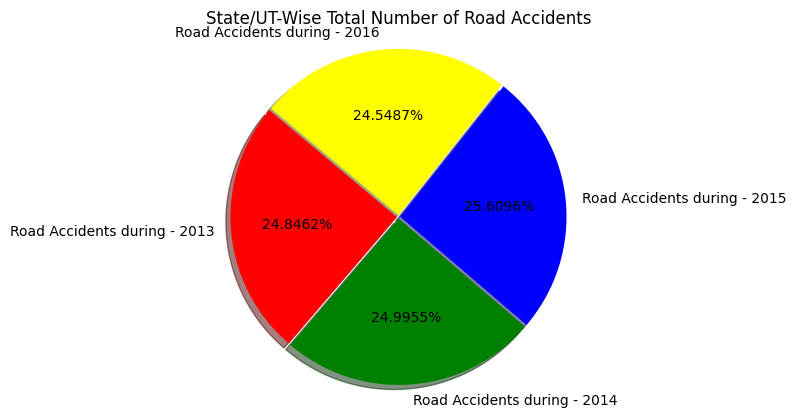

In [ ]:
labels = 'Road Accidents during - 2013', 'Road Accidents during - 2014', 'Road Accidents during - 2015', 'Road Accidents during - 2016'
sizes = [mean1, mean2, mean3, mean4]
colors = ['red', 'green', 'blue', 'yellow']
plot.title("State/UT-Wise Total Number of Road Accidents")
plot.pie(sizes, labels = labels, colors = colors, explode = explode,
       shadow = True, autopct = '%.4f%%', startangle = 140)
plot.axis('equal')
plot.show()

In [ ]:
L1 = np.mean(E['Total Number of Accidents Per Lakh Population - 2013'])
print("Mean of accidents per lakh population in 2013 : {}".format(L1))

Mean of accidents per lakh population in 2013 : 40.77837837837838


In [ ]:
L2 = np.mean(E['Total Number of Accidents Per Lakh Population - 2014'])
print("Mean of accidents per lakh population in 2014 : {}".format(L2))

Mean of accidents per lakh population in 2014 : 38.8


In [ ]:
L3 = np.mean(E['Total Number of Accidents Per Lakh Population - 2015'])
print("Mean of accidents per lakh population in 2015 : {}".format(L3))

Mean of accidents per lakh population in 2015 : 39.72972972972972


In [ ]:
L4 = np.mean(E['Total Number of Accidents Per Lakh Population - 2016'])
print("Mean of accidents per lakh population in 2016 : {}".format(L4))

Mean of accidents per lakh population in 2016 : 38.564864864864866


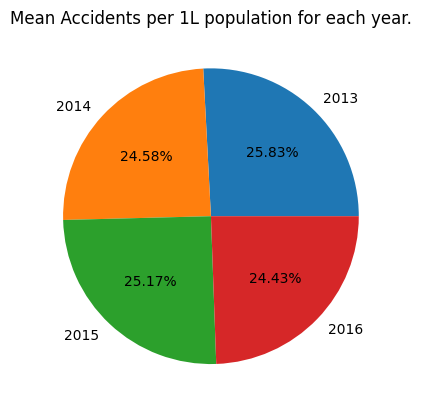

In [ ]:
labels = ('2013','2014','2015','2016')
performance = [L1, L2, L3, L4]
plot.pie(performance, labels = labels, autopct = '%.2f%%', center = (0,0))
plot.title("Mean Accidents per 1L population for each year.")
plot.show()

In [22]:
Male = np.mean(C['Offenders (Driver/Pedestrian) Died_Male'])
print("Mean of Male : {}".format(Male))

Mean of Male : 251.59251559251558


In [21]:
Female = np.mean(C['Offenders (Driver/Pedestrian) Died_Female'])
print("Mean of Female : {}".format(Female))

Mean of Female : 21.717255717255718


In [20]:
trans = np.mean(C['Offenders (Driver/Pedestrian) Died_Transgender'])
print("Mean of Transgender : {}".format(trans))

Mean of Transgender : 0.0


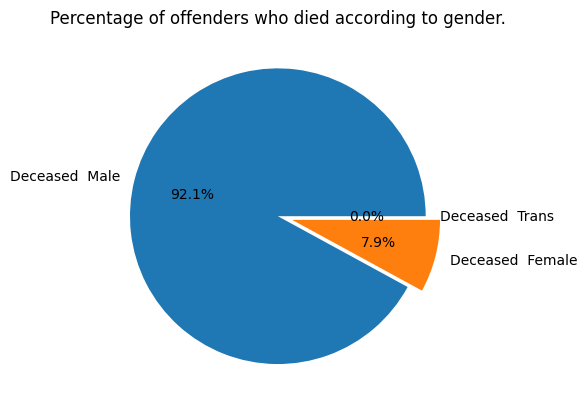

In [24]:
sizes = [Male, Female, trans]
labels = ['Deceased  Male','Deceased  Female', 'Deceased  Trans']
explode = (0, 0.1, 0)
plt.pie(sizes, labels = labels, explode = explode, autopct = '%.1f%%')
plt.title("Percentage of offenders who died according to gender.")
plt.show()

In [ ]:
meanVictMale = np.mean(C['Victims Died_Male'])
meanVictFemale = np.mean(C['Victims Died_Female'])
meanVicttrans = np.mean(C['Victims Died_Transgender'])


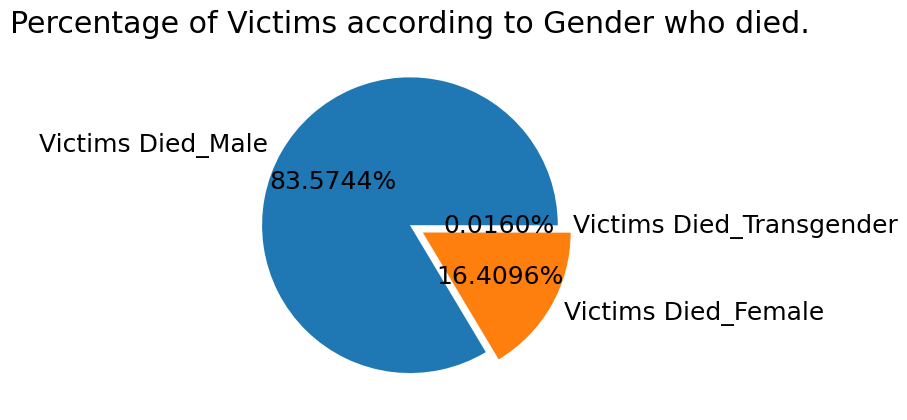

In [ ]:
sizes = [meanVictMale, meanVictFemale, meanVicttrans]
labels = 'Victims Died_Male', 'Victims Died_Female', 'Victims Died_Transgender'
explode =(0, 0.1, 0)

plot.pie(sizes, labels = labels, explode = explode, autopct = '%.4f%%')
plot.title("Percentage of Victims according to Gender who died.")
plot.show()

In [ ]:
mean_Off_Total = (np.mean(C['Offenders (Driver/Pedestrian) Died_Total']))
mean_Vict_Total = (np.mean(C['Victims Died_Total']))
mean_Off_Total, mean_Vict_Total

(273.3097713097713, 844.6049896049896)

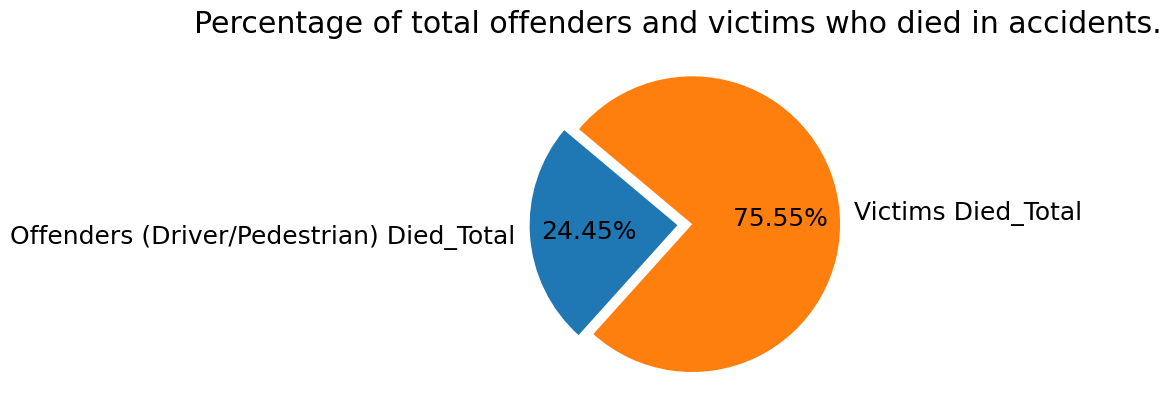

In [ ]:
labels = 'Offenders (Driver/Pedestrian) Died_Total','Victims Died_Total'
sizes = [mean_Off_Total, mean_Vict_Total]
explode = (0,0.1)
plot.title("Percentage of total offenders and victims who died in accidents.")
plot.pie(sizes, labels = labels, explode = explode, autopct = '%.2f%%', startangle = 140)
plot.show()

In [ ]:
# Required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (ensure the file path is correct)
file_path = '/content/Reason.xlsx'
df = pd.read_excel(file_path)

# Feature selection - focusing on over-speeding accidents on different types of highways
features = df[
    [
        "Over-Speeding - National Highways under NHAI - Total Accidents",
        "Over-Speeding - National Highways under State PWD - Total Accidents",
        "Over-Speeding - National Highways under Other department - Total Accidents",
    ]
]

# Target variable: Deaths caused by over-speeding on highways under NHAI
target = df["Over-Speeding - National Highways under NHAI - Death"]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 157252.00898617003
R-squared: 0.8543192913373301


In [ ]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (ensure the file path is correct)
file_path = '/content/Reason.xlsx'
df = pd.read_excel(file_path)


# Feature selection - focusing on over-speeding accidents on different types of highways
features = df[
    [
        "Over-Speeding - National Highways under NHAI - Total Accidents",
        "Over-Speeding - National Highways under State PWD - Total Accidents",
        "Over-Speeding - National Highways under Other department - Total Accidents",
    ]
]

# Target variable: Deaths caused by over-speeding on highways under NHAI
target = df["Over-Speeding - National Highways under NHAI - Death"]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Convert continuous predictions into categories: "High" or "Low"
# For this, we can use the median or mean of the deaths as a threshold
threshold = target.median()
y_test_class = np.where(y_test > threshold, 1, 0)  # 1 for High, 0 for Low
y_pred_class = np.where(y_pred > threshold, 1, 0)

# Calculate F1 Score
f1 = f1_score(y_test_class, y_pred_class)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'F1 Score: {f1}')
print(classification_report(y_test_class, y_pred_class))





Mean Squared Error: 157252.00898617003
R-squared: 0.8543192913373301
F1 Score: 0.9090909090909091
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8



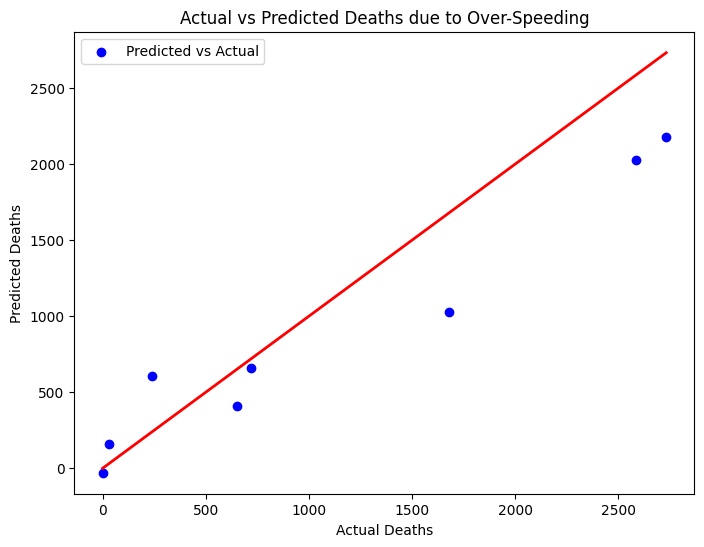

In [ ]:
# Visualization: Scatter plot between Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.title('Actual vs Predicted Deaths due to Over-Speeding')
plt.legend()
plt.show()

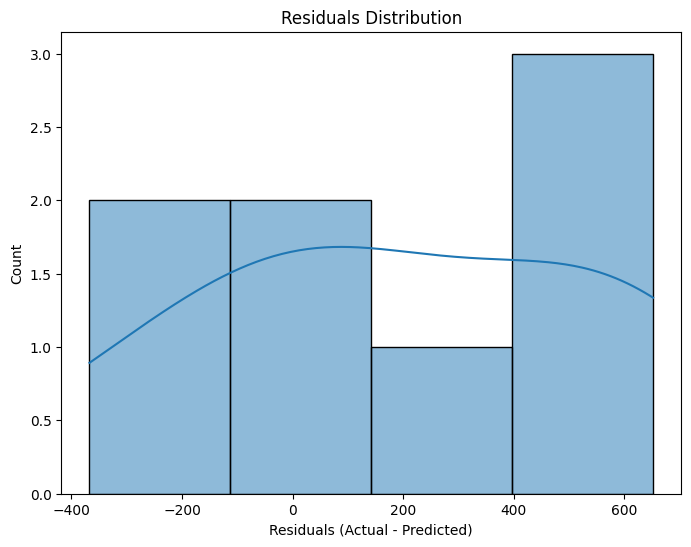

In [ ]:
# Residual Plot: Errors between Actual and Predicted
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals (Actual - Predicted)')
plt.title('Residuals Distribution')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the data (replace with actual path)
file_path = '/content/Fault.xlsx'  # Update this with the correct path
data = pd.read_excel(file_path)

# Preprocessing
data = data.replace(',', '', regex=True)
data = data.apply(pd.to_numeric, errors='coerce')

features = [
    # List of features
    'Fault of Driver-Total No. of Road Accidents - 2014',
    'Fault of Driver-Total No. of Road Accidents - 2014 per 1L people',
    'Fault of Driver-Number of Persons-Killed - 2014',
    'Fault of Driver-Number of Persons-Killed - 2014 per 1L people',
    'Fault of Driver-Number of Persons-Injured - 2014',
    'Fault of Driver-Number of Persons-Injured - 2014 per 1L people',
    'Fault of Driver of other vehicles-Total No. of Road Accidents - 2014',
    'Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people',
    'Fault of Driver of other vehicles-Number of Persons-Killed - 2014',
    'Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people',
    'Fault of Driver of other vehicles-Number of Persons-Injured - 2014',
    'Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people',
    'Fault of Pedestrian-Total No. of Road Accidents - 2014',
    'Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people',
    'Fault of Pedestrian-Number of Persons-Killed - 2014',
    'Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people',
    'Fault of Pedestrian-Number of Persons-Injured - 2014',
    'Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people',
    'Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014',
    'Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people',
    'Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014',
    'Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people',
    'Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014',
    'Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people',
    'Defect in Road Condition-Total No. of Road Accidents - 2014',
    'Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people',
    'Defect in Road Condition-Number of Persons-Killed - 2014',
    'Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people',
    'Defect in Road Condition-Number of Persons-Injured - 2014',
    'Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people',
    'Weather Condition-Total No. of Road Accidents - 2014',
    'Weather Condition-Total No. of Road Accidents - 2014 per 1L people',
    'Weather Condition-Number of Persons-Killed - 2014',
    'Weather Condition-Number of Persons-Killed - 2014 per 1L people',
    'Weather Condition-Number of Persons-Injured - 2014',
    'Weather Condition-Number of Persons-Injured - 2014 per 1L people',
    'Population'
]

target_accidents = 'Fault of Driver-Total No. of Road Accidents - 2014'
target_killed = 'Fault of Driver-Number of Persons-Killed - 2014'
target_injured = 'Fault of Driver-Number of Persons-Injured - 2014'

# Define independent (X) and dependent (Y) variables
X = data[features]
Y_accidents = data[target_accidents]
Y_killed = data[target_killed]
Y_injured = data[target_injured]

# Split the data into training and testing sets
X_train, X_test, Y_accidents_train, Y_accidents_test = train_test_split(X, Y_accidents, test_size=0.2, random_state=42)
X_train_killed, X_test_killed, Y_killed_train, Y_killed_test = train_test_split(X, Y_killed, test_size=0.2, random_state=42)
X_train_injured, X_test_injured, Y_injured_train, Y_injured_test = train_test_split(X, Y_injured, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_killed_scaled = scaler.fit_transform(X_train_killed)
X_test_killed_scaled = scaler.transform(X_test_killed)

X_train_injured_scaled = scaler.fit_transform(X_train_injured)
X_test_injured_scaled = scaler.transform(X_test_injured)

# Set up the Random Forest Regressor with hyperparameter tuning
rf_accidents = RandomForestRegressor(random_state=42)
rf_killed = RandomForestRegressor(random_state=42)
rf_injured = RandomForestRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 150],  # Fewer options
    'max_depth': [None, 10],     # Fewer options
    'min_samples_split': [2, 5], # Fewer options
}

# Hyperparameter tuning for accidents prediction (with reduced parameter grid)
grid_rf_accidents = GridSearchCV(estimator=rf_accidents, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_rf_accidents.fit(X_train_scaled, Y_accidents_train)
best_rf_accidents = grid_rf_accidents.best_estimator_

# Hyperparameter tuning for killed prediction (with reduced parameter grid)
grid_rf_killed = GridSearchCV(estimator=rf_killed, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_rf_killed.fit(X_train_killed_scaled, Y_killed_train)
best_rf_killed = grid_rf_killed.best_estimator_

# Hyperparameter tuning for injured prediction (with reduced parameter grid)
grid_rf_injured = GridSearchCV(estimator=rf_injured, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_rf_injured.fit(X_train_injured_scaled, Y_injured_train)
best_rf_injured = grid_rf_injured.best_estimator_

# Make predictions using the best models
Y_accidents_pred = best_rf_accidents.predict(scaler.transform(X_test))
Y_killed_pred = best_rf_killed.predict(scaler.transform(X_test_killed))
Y_injured_pred = best_rf_injured.predict(scaler.transform(X_test_injured))

# Evaluate the models
mse_accidents = mean_squared_error(Y_accidents_test, Y_accidents_pred)
r2_accidents = r2_score(Y_accidents_test, Y_accidents_pred)

mse_killed = mean_squared_error(Y_killed_test, Y_killed_pred)
r2_killed = r2_score(Y_killed_test, Y_killed_pred)

mse_injured = mean_squared_error(Y_injured_test, Y_injured_pred)
r2_injured = r2_score(Y_injured_test, Y_injured_pred)

# Print evaluation metrics
print(f'--- Accidents Prediction ---')
print(f'Mean Squared Error for Road Accidents: {mse_accidents}')
print(f'R-squared for Road Accidents: {r2_accidents}\n')

print(f'--- Persons Killed Prediction ---')
print(f'Mean Squared Error for Persons Killed: {mse_killed}')
print(f'R-squared for Persons Killed: {r2_killed}\n')

print(f'--- Persons Injured Prediction ---')
print(f'Mean Squared Error for Persons Injured: {mse_injured}')
print(f'R-squared for Persons Injured: {r2_injured}')


--- Accidents Prediction ---
Mean Squared Error for Road Accidents: 1564985.0439749996
R-squared for Road Accidents: 0.991616925611038

--- Persons Killed Prediction ---
Mean Squared Error for Persons Killed: 394453.48202500015
R-squared for Persons Killed: 0.9476802097491757

--- Persons Injured Prediction ---
Mean Squared Error for Persons Injured: 13685144.171687497
R-squared for Persons Injured: 0.9339470879119969


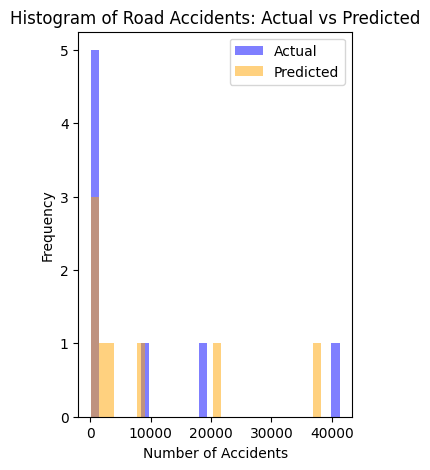

In [ ]:
plt.figure(figsize=(12, 5))

# Histogram of predicted vs actual for accidents
plt.subplot(1, 3, 1)
plt.hist(Y_accidents_test, bins=30, alpha=0.5, label='Actual', color='blue')
plt.hist(Y_accidents_pred, bins=30, alpha=0.5, label='Predicted', color='orange')
plt.title('Histogram of Road Accidents: Actual vs Predicted')
plt.xlabel('Number of Accidents')
plt.ylabel('Frequency')
plt.legend()


Text(0, 0.5, 'Predicted Number of Accidents')

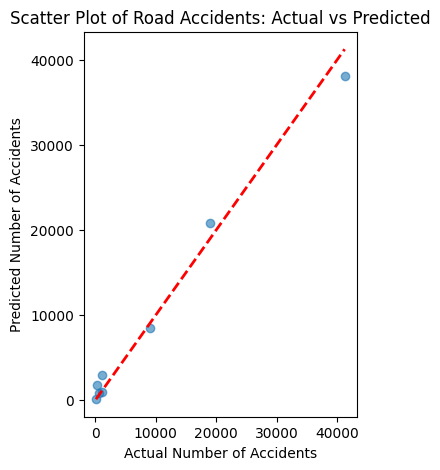

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 2)
plt.scatter(Y_accidents_test, Y_accidents_pred, alpha=0.6)
plt.plot([Y_accidents_test.min(), Y_accidents_test.max()], [Y_accidents_test.min(), Y_accidents_test.max()], 'r--', lw=2)
plt.title('Scatter Plot of Road Accidents: Actual vs Predicted')
plt.xlabel('Actual Number of Accidents')
plt.ylabel('Predicted Number of Accidents')


<ipython-input-29-f635d91d6965>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


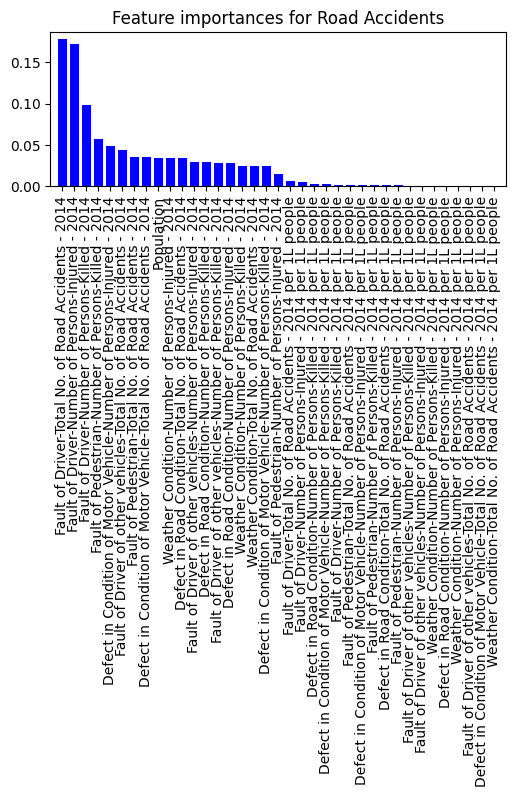

In [ ]:
plt.figure(figsize=(20, 2))
plt.subplot(1, 3, 3)
importances = best_rf_accidents.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title("Feature importances for Road Accidents")
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()

plt.show()


In [ ]:
helmetMale = (np.mean(g['Non-wearing of Helmet - Male']))
helmetFemale = (np.mean(g['Non-wearing of Helmet - Female']))
helmetFemale, helmetMale

(82.10810810810811, 465.72972972972974)

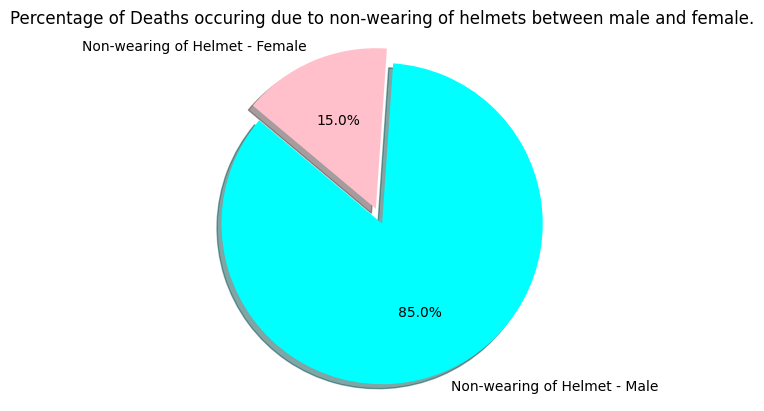

In [ ]:
labels = 'Non-wearing of Helmet - Male','Non-wearing of Helmet - Female'
sizes = [helmetMale, helmetFemale]
colors = ['cyan', 'pink']
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Percentage of Deaths occuring due to non-wearing of helmets between male and female.")

plt.axis('equal')
plt.show()

In [ ]:
D.head()

,Unnamed: 0,States/Uts,year-2003,year-2004,year-2005,year-2006,year-2007,year-2008,year-2009,year-2010,year-2011,year-2012,year-2013,year-2014,year-2015,year-2016
0,0,Andhra Pradesh,8616,9343,9126,11378,11885,12233,12676,13932,13783,13560,13175,7277,7524,7851
1,1,Arunachal Pradesh,65,79,63,87,81,90,114,108,96,94,120,92,117,103
2,2,Assam,1120,1177,1420,1627,1483,1641,1735,1924,2015,2011,2162,2169,2122,2445
3,3,Bihar,2138,1579,1462,2315,3074,3514,4038,4513,4676,4706,4612,4505,4771,4425
4,4,Chhattisgarh,1788,1892,2049,2288,2496,2600,2566,2668,2659,2783,3059,3570,3710,3527


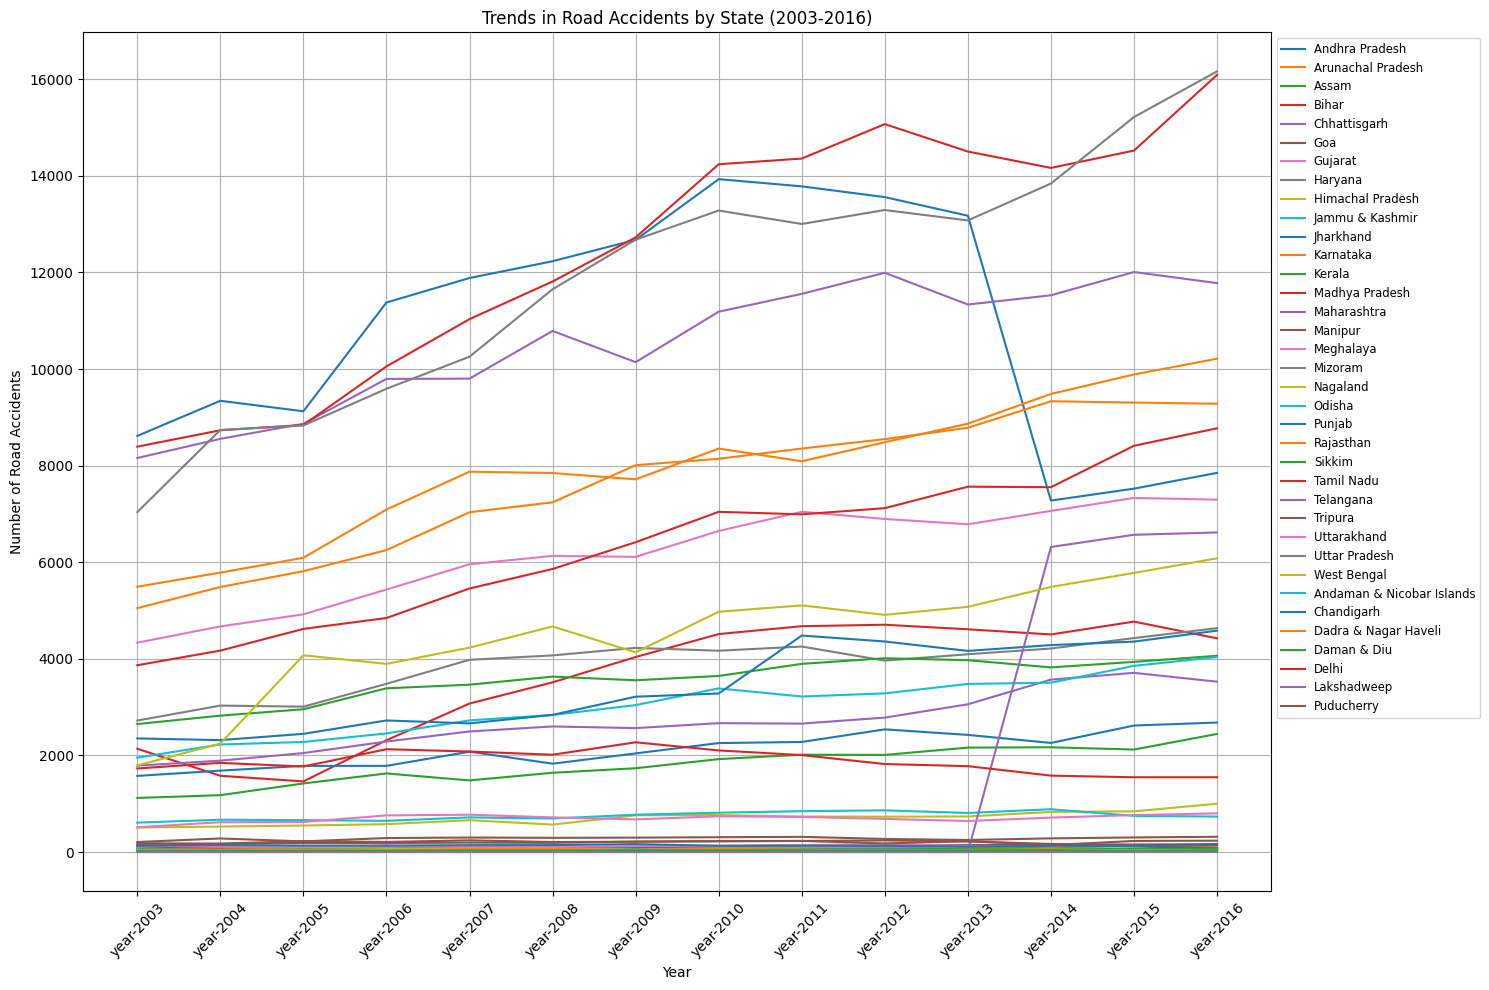

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the dataset
data = {
    "States": [
        "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh",
        "Goa", "Gujarat", "Haryana", "Himachal Pradesh", "Jammu & Kashmir",
        "Jharkhand", "Karnataka", "Kerala", "Madhya Pradesh", "Maharashtra",
        "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Odisha",
        "Punjab", "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana",
        "Tripura", "Uttarakhand", "Uttar Pradesh", "West Bengal",
        "Andaman & Nicobar Islands", "Chandigarh", "Dadra & Nagar Haveli",
        "Daman & Diu", "Delhi", "Lakshadweep", "Puducherry", "All India"
    ],
    "year-2003": [8616, 65, 1120, 2138, 1788, 207, 4335, 2722, 507, 609,
                  1576, 5493, 2650, 3868, 8159, 114, 137, 71, 43, 1954,
                  2352, 5050, 22, 8393, 0, 147, 513, 7038, 1793, 12,
                  132, 34, 19, 1730, 0, 182, 73589],
    "year-2004": [9343, 79, 1177, 1579, 1892, 281, 4671, 3032, 527, 669,
                  1685, 5786, 2824, 4171, 8555, 87, 108, 40, 42, 2227,
                  2317, 5488, 26, 8733, 0, 166, 617, 8739, 2246, 15,
                  144, 46, 23, 1846, 0, 176, 79357],
    "year-2005": [9126, 63, 1420, 1462, 2049, 220, 4922, 3010, 549, 660,
                  1784, 6093, 2956, 4620, 8867, 115, 106, 52, 48, 2279,
                  2447, 5815, 53, 8843, 0, 188, 622, 8832, 4073, 17,
                  133, 51, 21, 1771, 0, 224, 83491],
    "year-2006": [11378, 87, 1627, 2315, 2288, 290, 5435, 3483, 577, 646,
                  1784, 7092, 3390, 4846, 9796, 127, 125, 53, 60, 2456,
                  2724, 6252, 40, 10055, 0, 187, 758, 9592, 3896, 18,
                  134, 43, 24, 2129, 1, 209, 93917],
    "year-2007": [11885, 81, 1483, 3074, 2496, 300, 5958, 3980, 659, 717,
                  2078, 7875, 3465, 5457, 9802, 103, 107, 44, 74, 2726,
                  2664, 7036, 31, 11034, 0, 195, 773, 10256, 4232, 21,
                  142, 61, 29, 2081, 0, 242, 101161],
    "year-2008": [12233, 90, 1641, 3514, 2600, 294, 6132, 4071, 568, 694,
                  1829, 7848, 3632, 5861, 10789, 109, 103, 53, 57, 2838,
                  2840, 7241, 32, 11813, 0, 190, 717, 11652, 4671, 22,
                  144, 62, 29, 2015, 0, 207, 106591],
    "year-2009": [12676, 114, 1735, 4038, 2566, 298, 6112, 4227, 760, 773,
                  2042, 7717, 3556, 6415, 10143, 99, 124, 51, 33, 3043,
                  3216, 8010, 55, 12727, 0, 216, 676, 12679, 4135, 31,
                  164, 43, 32, 2272, 0, 214, 110993],
    "year-2010": [13932, 108, 1924, 4513, 2668, 307, 6648, 4168, 766, 814,
                  2256, 8354, 3646, 7044, 11188, 121, 131, 63, 24, 3388,
                  3282, 8143, 32, 14241, 0, 224, 740, 13282, 4975, 25,
                  129, 61, 30, 2104, 0, 224, 119558],
    "year-2011": [13783, 96, 2015, 4676, 2659, 314, 7045, 4255, 735, 846,
                  2279, 8091, 3896, 6992, 11557, 142, 147, 59, 24, 3220,
                  4483, 8354, 48, 14359, 0, 229, 726, 13004, 5107, 17,
                  130, 50, 33, 2007, 0, 230, 121618],
    "year-2012": [13560, 94, 2011, 4706, 2783, 271, 6896, 3963, 732, 863,
                  2540, 8485, 4013, 7120, 11994, 138, 161, 69, 24, 3285,
                  4359, 8550, 44, 15072, 0, 240, 686, 13293, 4911, 24,
                  129, 30, 26, 1822, 0, 178, 123093],
    "year-2013": [13175, 120, 2162, 4612, 3059, 249, 6786, 4095, 736, 809,
                  2425, 8870, 3972, 7565, 11336, 144, 124, 77, 34, 3481,
                  4164, 8785, 66, 14504, 0, 219, 642, 13077, 5077, 32,
                  114, 47, 30, 1778, 0, 223, 122589],
    "year-2014": [7277, 92, 2169, 4505, 3570, 283, 7063, 4214, 831, 886,
                  2259, 9485, 3823, 7554, 11528, 149, 127, 88, 68, 3506,
                  4285, 9334, 53, 14165, 6316, 168, 713, 13842, 5489, 20,
                  130, 53, 38, 1582, 0, 145, 125828],
    "year-2015": [7524, 117, 2122, 4771, 3710, 302, 7332, 4430, 843, 749,
                  2619, 9888, 3937, 8412, 12009, 116, 153, 50, 23, 3855,
                  4357, 9306, 61, 14524, 6569, 154, 765, 15218, 5779, 22,
                  124, 36, 15, 1548, 0, 229, 131726],
    "year-2016": [7851, 103, 2445, 4425, 3527, 316, 7296, 4636, 1000, 734,
                  2681, 10215, 4064, 8774, 11780, 78, 146, 61, 41, 4036,
                  4584, 9282, 60, 16092, 6617, 165, 801, 16164, 6081, 16,
                  144, 40, 32, 1548, 1, 235, 136071],
    }

# Create a DataFrame
df = pd.DataFrame(data)

# Set States as index
df.set_index("States", inplace=True)

# Transpose the DataFrame for easier plotting
df_transposed = df.T

# Plotting trends for individual states
plt.figure(figsize=(15, 10))
for state in df_transposed.columns[:-1]:  # Exclude "All India"
    plt.plot(df_transposed.index, df_transposed[state], marker='', label=state)

plt.title('Trends in Road Accidents by State (2003-2016)')
plt.xlabel('Year')
plt.ylabel('Number of Road Accidents')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.grid()
plt.tight_layout()
plt.show()

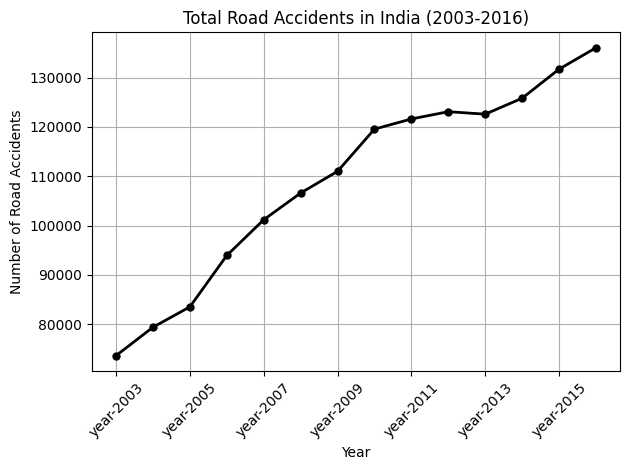

In [ ]:
# Aggregating data for all states combined
df_transposed['All India'].plot(marker='o', linestyle='-', color='black', linewidth=2, markersize=5)
plt.title('Total Road Accidents in India (2003-2016)')
plt.xlabel('Year')
plt.ylabel('Number of Road Accidents')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your data from an Excel file
file_path = '/content/Lanes.xlsx'
df = pd.read_excel(file_path)

# Display the DataFrame to check if the data is loaded correctly
print(df.head())

# Feature selection
X = df[['Single Lane - Accident - 2014', 'Two Lanes - Accident - 2014',
         '3 Lanes or more w.o Median - Accident - 2014','4 Lanes with Median - Accident - 2014','Population']]
y = df['total']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization and training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Predict future values (example)
future_data = pd.DataFrame({
    'Single Lane - Accident - 2014': [9000],
    'Two Lanes - Accident - 2014': [12000],
    '3 Lanes or more w.o Median - Accident - 2014': [500],
    '4 Lanes with Median - Accident - 2014' :[2000],
    'Population': [60000000],
})

new_var = model.predict

future_predictions = new_var(future_data)
print(f'Future Predictions: {future_predictions}')


   Unnamed: 0 S.No           State/UT  Single Lane - Accident - 2014  \
0           0    1     Andhra Pradesh                           8634   
1           1    2  Arunachal Pradesh                             90   
2           2    3              Assam                           3888   
3           3    4              Bihar                           3731   
4           4    5       Chhattisgarh                           7961   

   Single Lane - Killed - 2014  Single Lane - Injured - 2014  \
0                         2958                         13541   
1                           60                           152   
2                         1217                          3195   
3                         1815                          2475   
4                         2244                          7762   

   Two Lanes - Accident - 2014  Two Lanes - Killed - 2014  \
0                        10327                       2994   
1                          115                         59   

In [ ]:
row, column = E.shape
round(((row - E.isnull().sum())/ row) * 100,2)


,0
SI. No.,100.0
States/UTs,100.0
State/UT-Wise Total Number of Road Accidents during - 2013,100.0
State/UT-Wise Total Number of Road Accidents during - 2014,100.0
State/UT-Wise Total Number of Road Accidents during - 2015,100.0
State/UT-Wise Total Number of Road Accidents during - 2016,100.0
Share of States/UTs in Total Number of Road Accidents - 2013,100.0
Share of States/UTs in Total Number of Road Accidents - 2014,100.0
Share of States/UTs in Total Number of Road Accidents - 2015,100.0
Share of States/UTs in Total Number of Road Accidents - 2016,100.0


In [ ]:
driverFault = A['Fault of Driver-Number of Persons-Killed - 2014 per 1L people']
otherDriversFault = A['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people']
pedestrianFault = A['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people']
conditionOfVehicleFault = A['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people']
roadConditionFault = A['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people']
weatherConditionFault = A['Weather Condition-Number of Persons-Killed - 2014 per 1L people']
passengerFault = A['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people']
poorLightFault = A['Poor light-Number of Persons-Killed - 2014 per 1L people']
bouldersFault = A['Falling of boulders-Number of Persons-Killed - 2014 per 1L people']
otherCauses = A['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people']

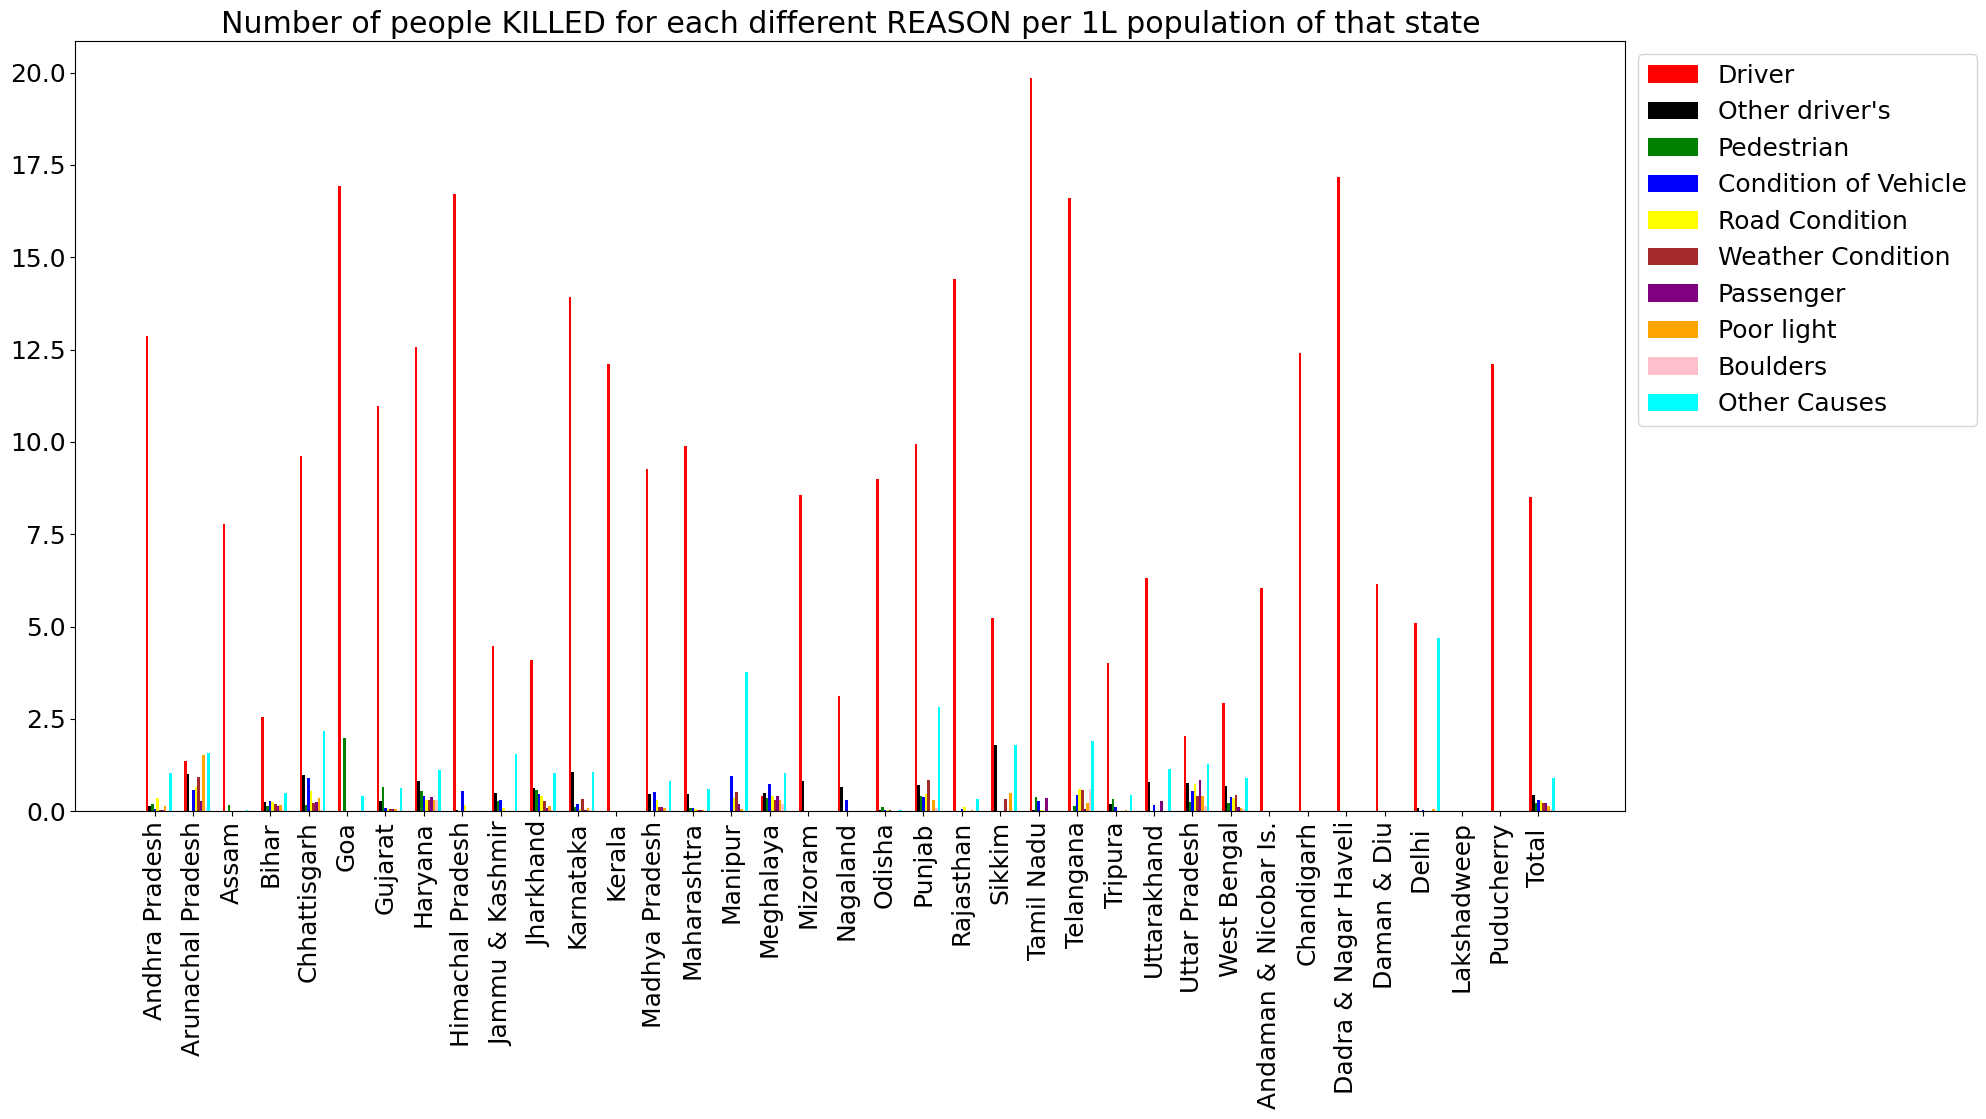

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])
UT=UT*3

plt.bar(UT-0.6, driverFault, width = 0.2, color = 'r', align = 'center', label = 'Driver')
plt.bar(UT-0.4, otherDriversFault,width=0.2, color='black', align='center', label='Other driver\'s')
plt.bar(UT-0.2, pedestrianFault,width=0.2, color='g', align='center', label='Pedestrian')
plt.bar(UT, conditionOfVehicleFault,width=0.2, color='b', align='center', label='Condition of Vehicle')
plt.bar(UT+0.2, roadConditionFault,width=0.2, color='yellow', align='center', label='Road Condition')
plt.bar(UT+0.4, weatherConditionFault,width=0.2, color='brown', align='center', label='Weather Condition')
plt.bar(UT+0.6, passengerFault,width=0.2, color='purple', align='center', label='Passenger')
plt.bar(UT+0.8, poorLightFault,width=0.2, color='orange', align='center', label='Poor light')
plt.bar(UT+1.0, bouldersFault,width=0.2, color='pink', align='center', label='Boulders')
plt.bar(UT+1.2, otherCauses,width=0.2, color='cyan', align='center', label='Other Causes')

plt.xticks(UT,A['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of people KILLED for each different REASON per 1L population of that state")
plt.show()